In [58]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

#import nltk
#nltk.download('stopwords')
data = pd.read_csv('citation_sentiment_corpus.txt', sep = "	", header = None)

In [59]:
data.columns = ["Source_PaperID", "Target_PaperID", "Sentiment", "Citation_text"]

In [61]:
print(data)
import collections, numpy
counter = collections.Counter(data['Sentiment'].values)
print(counter)

     Source_PaperID Target_PaperID Sentiment  \
0          A00-1043       A00-2024         o   
1          H05-1033       A00-2024         o   
2          I05-2009       A00-2024         o   
3          I05-2009       A00-2024         o   
4          I05-2009       A00-2024         o   
...             ...            ...       ...   
8731       W98-1118       W96-0213         p   
8732       W99-0606       W96-0213         o   
8733       W99-0607       W96-0213         o   
8734       W99-0607       W96-0213         p   
8735       W99-0608       W96-0213         o   

                                          Citation_text  
0     We analyzed a set of articles and identified s...  
1     Table 3: Example compressions Compression AvgL...  
2     5.3 Related works and discussion Our two-step ...  
3     (1999) proposed a summarization system based o...  
4     We found that the deletion of lead parts did n...  
...                                                 ...  
8731  He has achi

data.Sentiment = data.Sentiment.replace({"o": "0",
                                         "p": "1",
                                         "n": "-1"})

In [5]:
print(data)

     Source_PaperID Target_PaperID Sentiment  \
0          A00-1043       A00-2024         0   
1          H05-1033       A00-2024         0   
2          I05-2009       A00-2024         0   
3          I05-2009       A00-2024         0   
4          I05-2009       A00-2024         0   
...             ...            ...       ...   
8731       W98-1118       W96-0213         1   
8732       W99-0606       W96-0213         0   
8733       W99-0607       W96-0213         0   
8734       W99-0607       W96-0213         1   
8735       W99-0608       W96-0213         0   

                                          Citation_text  
0     We analyzed a set of articles and identified s...  
1     Table 3: Example compressions Compression AvgL...  
2     5.3 Related works and discussion Our two-step ...  
3     (1999) proposed a summarization system based o...  
4     We found that the deletion of lead parts did n...  
...                                                 ...  
8731  He has achi

In [6]:
data.isnull().sum()

Source_PaperID    0
Target_PaperID    0
Sentiment         0
Citation_text     0
dtype: int64

In [7]:
Y = data['Sentiment']

In [8]:
port_stem = PorterStemmer()

In [9]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content 
                       if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [10]:
data['Citation_text'] = data['Citation_text'].apply(stemming)

In [11]:
print(data['Citation_text'])

0       analyz set articl identifi six major oper use ...
1       tabl exampl compress compress avglen rate base...
2       relat work discuss two step model essenti belo...
3       propos summar system base draft revis jing mck...
4       found delet lead part occur often summari unli...
                              ...                        
8731    achiev state art result appli e pars ratnapark...
8732    b brill wu magerman data r ratnaparkhi w weisc...
8733                        model use similar ratnaparkhi
8734    model exploit kind tag n gram inform form core...
8735    tabl tbl stand brill transform base error driv...
Name: Citation_text, Length: 8736, dtype: object


In [12]:
X = data['Citation_text'].values
Y = data['Sentiment'].values

In [13]:
# !pip install -U imbalanced-learn

In [14]:
print(X)

['analyz set articl identifi six major oper use edit extract sentenc includ remov extran phrase extract sentenc combin reduc sentenc sentenc syntact transform substitut phrase extract sentenc paraphras substitut phrase gener specif descript reorder extract sentenc jing mckeown jing mckeown'
 'tabl exampl compress compress avglen rate baselin bt step spade human tabl mean rate automat compress nalli ad simpl baselin compress algorithm propos jing mckeown remov preposit phrase claus toinfinit gerund'
 'relat work discuss two step model essenti belong categori work mani et al jing mckeown'
 ... 'model use similar ratnaparkhi'
 'model exploit kind tag n gram inform form core mani success tag model exampl kupiec merialdo ratnaparkhi'
 'tabl tbl stand brill transform base error driven tagget brill stand tagger base maimum entropi model ratnaparkhi spatter stand statist parser base decis tree magerman igtre stand memori base tagger daeleman et al']


In [15]:
print(Y)

['0' '0' '0' ... '0' '1' '0']


In [16]:
import collections, numpy
counter = collections.Counter(Y)
print(counter)

Counter({'0': 7627, '1': 829, '-1': 280})


In [17]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)
data['Citation_text'].values[0]


'analyz set articl identifi six major oper use edit extract sentenc includ remov extran phrase extract sentenc combin reduc sentenc sentenc syntact transform substitut phrase extract sentenc paraphras substitut phrase gener specif descript reorder extract sentenc jing mckeown jing mckeown'

In [18]:
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)
X, Y = sm.fit_resample(X,Y)

In [19]:
import collections, numpy
counter = collections.Counter(Y)
print(counter)

Counter({'0': 7627, '1': 7627, '-1': 7627})


In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [21]:
print(X_train)

  (0, 262)	0.22501479923302373
  (0, 403)	0.23843040646971747
  (0, 2395)	0.22581300108612398
  (0, 5005)	0.29793784428093906
  (0, 5764)	0.14052516383961272
  (0, 6066)	0.25580906984515883
  (0, 6547)	0.15885205788881704
  (0, 9749)	0.23788784688553072
  (0, 222)	0.07126412504980759
  (0, 783)	0.006213991850099465
  (0, 917)	0.30308981073537833
  (0, 1150)	0.14012306716216671
  (0, 2838)	0.013323701894482953
  (0, 3001)	0.07135557274648326
  (0, 3025)	0.008292034530138409
  (0, 3691)	0.3070629090974216
  (0, 4213)	0.18247718058641896
  (0, 4373)	0.013797039095538893
  (0, 4516)	0.009531976153987626
  (0, 4892)	0.007857970108794549
  (0, 5440)	0.16335233404419747
  (0, 5524)	0.007052849875504363
  (0, 5897)	0.11740466353295989
  (0, 6237)	0.008502502487422847
  (0, 6477)	0.007038736491700323
  :	:
  (16015, 360)	0.27185330087143067
  (16015, 1637)	0.20984379328005154
  (16015, 1838)	0.17232244780789416
  (16015, 2838)	0.17801094240087534
  (16015, 3082)	0.22245735621785692
  (16015, 31

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr) * 100

In [40]:
from sklearn import tree
DTclf = tree.DecisionTreeClassifier()
DTclf.fit(X_train, y_train)
y_pred_dt = DTclf.predict(X_test) 
acc_dt = accuracy_score(y_test, y_pred_dt) * 100

In [41]:
from sklearn.ensemble import RandomForestClassifier
RFclf = RandomForestClassifier(max_depth=2, random_state=0)
RFclf.fit(X_train, y_train)
y_pred_RF = RFclf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_RF) * 100

In [42]:
from sklearn import svm
SVMclf = svm.SVC()
SVMclf.fit(X_train, y_train)
y_pred_svm = SVMclf.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm) * 100

In [43]:
from sklearn.ensemble import AdaBoostClassifier
ADAclf = AdaBoostClassifier(n_estimators=100, random_state=0)
ADAclf.fit(X_train, y_train)
y_pred_ada = ADAclf.predict(X_test)
acc_ada = accuracy_score(y_test, y_pred_ada) * 100

In [44]:
from sklearn.ensemble import ExtraTreesClassifier
ETclf = ExtraTreesClassifier(n_estimators=100, random_state=0)
ETclf.fit(X_train, y_train)
y_pred_et = ETclf.predict(X_test)
acc_et = accuracy_score(y_test, y_pred_et) * 100

In [45]:
accuracy = [acc_lr, acc_dt, acc_rf, acc_svm, acc_ada, acc_et] 
models = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "AdaBoost", "Extra Tree"]
print(accuracy) 

[94.17334304442826, 91.7115804806992, 70.5753823743627, 97.8150036416606, 81.6897305171158, 98.0626365622724]


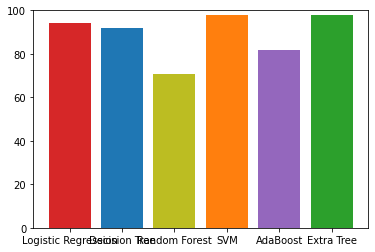

In [56]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

bar_labels = ['red', 'blue', 'olive', 'orange', 'purple', 'green']
bar_colors = ['tab:red', 'tab:blue', 'tab:olive', 'tab:orange', 'tab:purple', 'tab:green']

ax.bar(models, accuracy, label=bar_labels, color=bar_colors)
plt.ylim(0, 100)


plt.show() 